# Random Forest Regressor

---

**Источники:**

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

[1.11.2. Forests of randomized trees](https://scikit-learn.org/stable/modules/ensemble.html#forest)


[Random Forest Regression](https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f)

[Painless Random Forest Regression in Python – Step-by-Step with Sklearn](https://onestopdataanalysis.com/python-random-forest-regression/)

[Random forest](https://ru.wikipedia.org/wiki/Random_forest)

[Бэггинг](https://ru.wikipedia.org/wiki/%D0%91%D1%8D%D0%B3%D0%B3%D0%B8%D0%BD%D0%B3)

[How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)

[Partial Dependence and Individual Conditional Expectation Plots](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py)

[Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-dependence-plots)

[Partial Dependence Plots](https://towardsdatascience.com/tagged/partial-dependence-plots)

---


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

In [4]:
import numpy as np

np.__version__

'1.20.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.4'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Calculate Concrete Strength)](https://www.kaggle.com/prathamtripathi/regression-with-neural-networking)

In [8]:
df = pd.read_csv("./../../data/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Разделение данных на `X` и `y`

In [9]:
target = 'Strength'

In [10]:
from sklearn.model_selection import train_test_split

y = df[target].copy()
X = df.drop(columns=[target]).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

## Random Forest (Случайный лес) Regressor

[sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Основная идея заключается в использовании большого **ансамбля решающих деревьев (decision tree)**, каждое из которых само по себе даёт очень невысокое качество, но за счёт их большого количества результат получается хорошим.

Алгоритм применяется для задач **классификации, регрессии и кластеризации**.

**Достоинства:**
- Способность эффективно обрабатывать данные с большим числом признаков и классов.
- Нечувствительность к масштабированию (и вообще к любым монотонным преобразованиям) значений признаков.
- Одинаково хорошо обрабатываются как непрерывные, так и дискретные признаки. Существуют методы построения деревьев по данным с пропущенными значениями признаков.
- Существуют методы оценивания значимости отдельных признаков в модели.
- Внутренняя оценка способности модели к обобщению (тест по неотобранным образцам out-of-bag).
- Высокая параллелизуемость и масштабируемость.

**Недостатки:**
- Большой размер получающихся моделей. Требуется $O(K)$ памяти для хранения модели, где $K$ — число деревьев.

<center><img src="images/random_forest.png"/></center>

---

<center><img src="images/random_forest_2.png"/></center>

<center><img src="images/random_forest_regression_line.png"/></center>

## Анализ и обработка выбросов

In [13]:
def remove_outliers_iqr(data, col_name):
    print(f"column name: {col_name}\n")
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    data_new = data[~((data[col_name] < lower_fence) |
                      (data[col_name] > upper_fence))]
    
    diff_len = len(data) - len(data_new)
    print(f"removed: {diff_len}")
    
    _, axs = plt.subplots(1, 2, figsize=(10, 2))
    sns.boxplot(data=data_new[col_name], ax=axs[0])
    sns.histplot(data=data_new[col_name], ax=axs[1])
    
    return data_new.reset_index(drop=True)

## Анализ числовых признаков

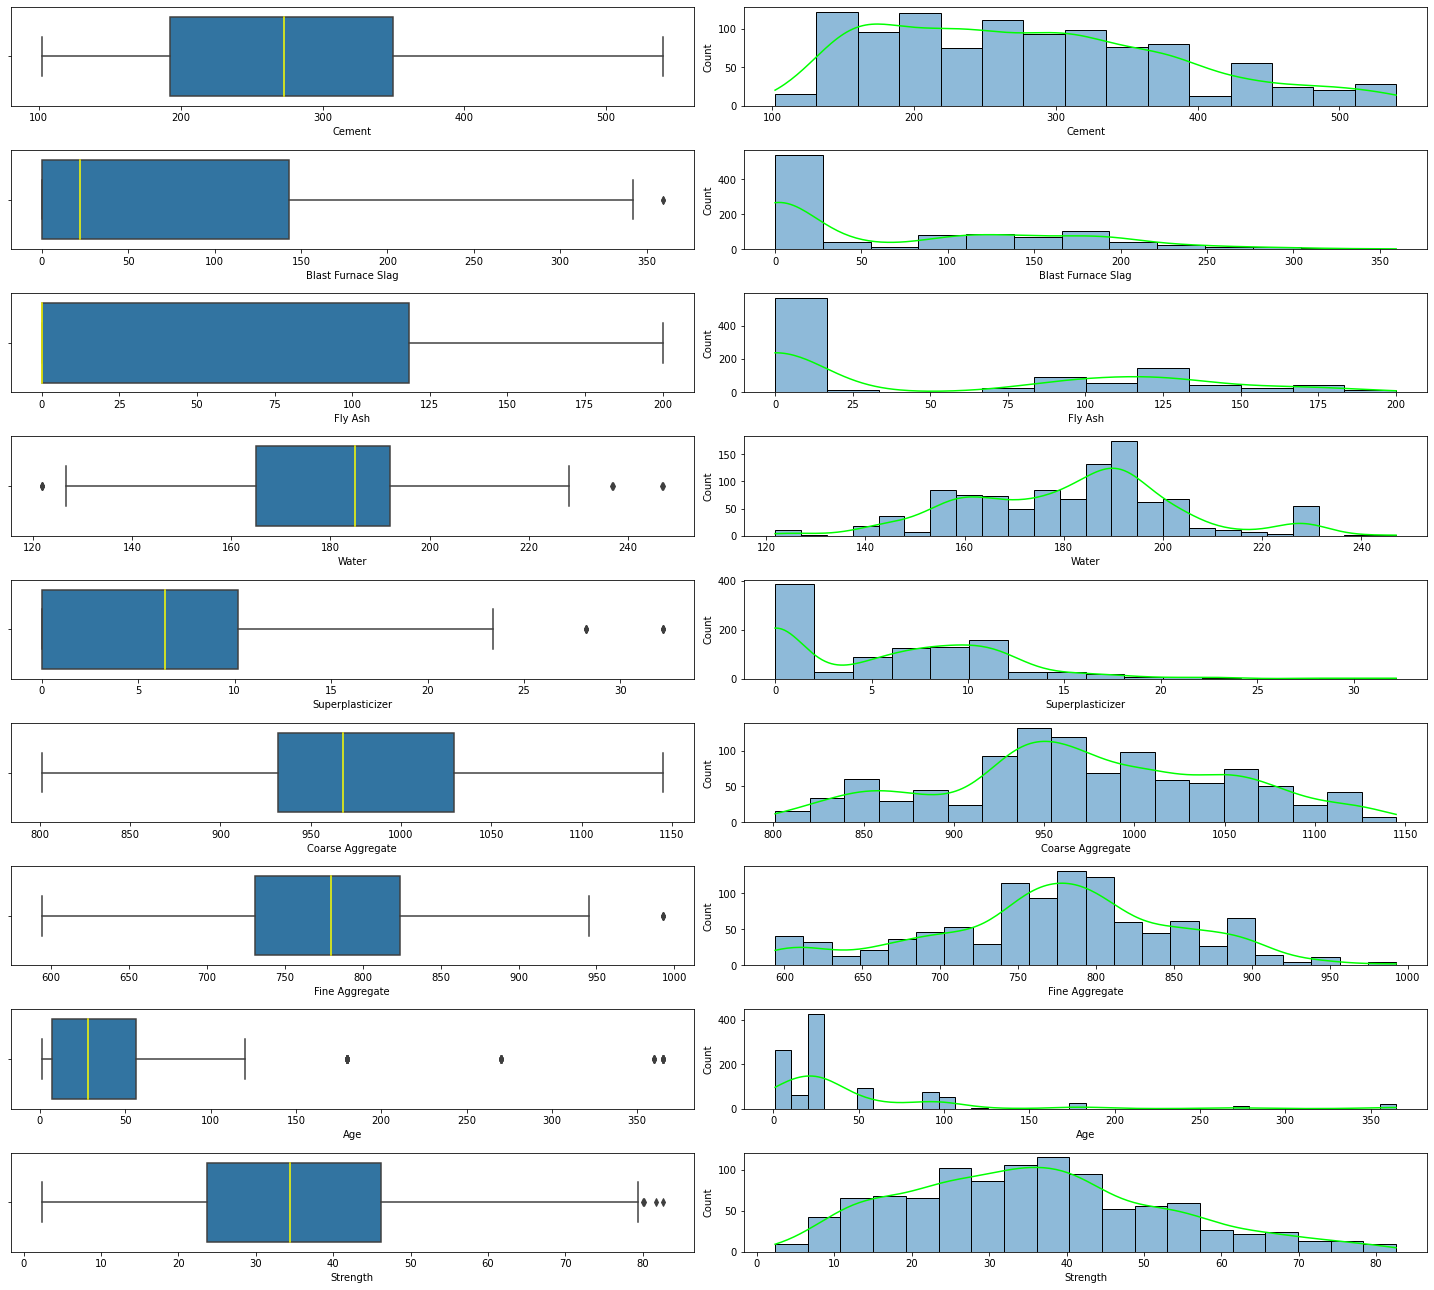

In [14]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 2 * len(num_cols)))

for index, column_name in enumerate(num_cols):
    sns.boxplot(x=df[column_name], ax=axs[index][0])
    axs[index][0].get_lines()[4].set_color('yellow')
    
    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1])
    axs[index][1].get_lines()[0].set_color('lime')
    
fig.tight_layout(pad=1.0)

## Анализ корреляций

In [30]:
from matplotlib.colors import BoundaryNorm

# функция, которая вычисляет коэффициент корреляции и 
# добавляет его в качестве "аннотации"
def corr(x, y, cor_name='pearson', **kwargs):
    if cor_name == 'pearson':
        prefix = 'p='
        cmap = plt.get_cmap('PiYG')
        xy=(0.1, 0.9)
        r, _ = stats.pearsonr(x, y)

    elif cor_name == 'spearman':
        prefix = 's='
        cmap = plt.get_cmap('PRGn')
        xy=(0.5, 0.1)
        r, _ = stats.spearmanr(x, y)
        
    ax = plt.gca()
    ax.annotate(text="{}{:.2f}".format(prefix, r),
                xy=xy,          
                xycoords=ax.transAxes, 
                size=20,       
                color=cmap(r))  

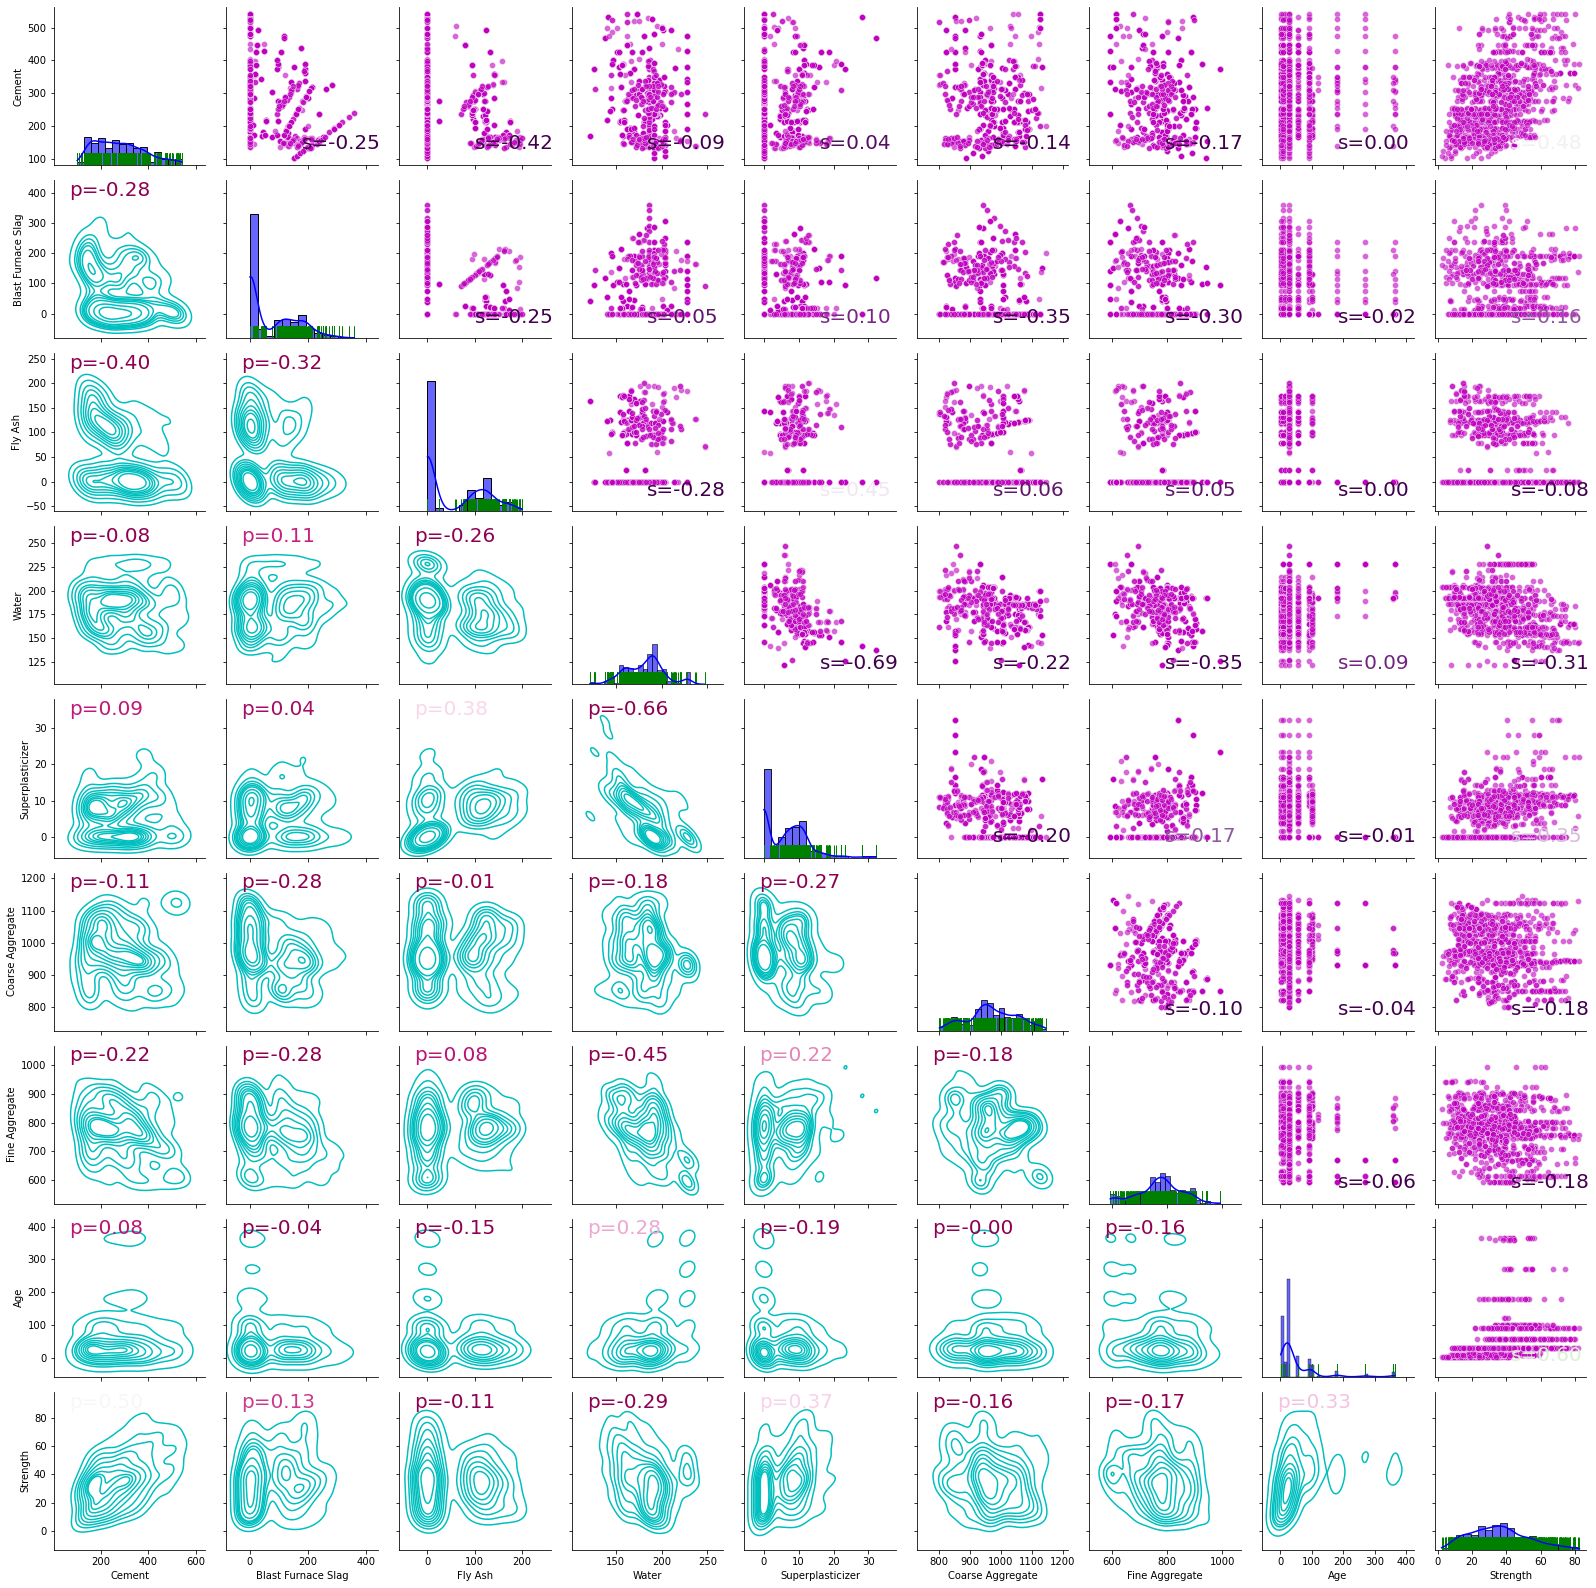

In [31]:
g = sns.PairGrid(df)

g.map_upper(sns.scatterplot, color='m', alpha=0.6)
g.map_upper(corr, cor_name='spearman')

g.map_diag(sns.histplot, color='blue', kde=True, alpha=0.6)
g.map_diag(sns.rugplot, color='green', height=0.08)

g.map_lower(sns.kdeplot, color='c')
g.map_lower(corr, cor_name='pearson')

## Анализ отсутствующих значений

In [32]:
X.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
dtype: int64

In [33]:
y.isna().sum()

0

Выводы: Отсутствующих значений нет.

## Важные параметры [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

- `n_estimators: int, default=100`
    - Количество деревьев в лесу.
    
    
- `criterion: {"mse", "mae"}, default="mse"`
    - Функция измерения качества разделения.
    - Поддерживаемые критерии: `"mse"` для среднеквадратичной ошибки, которая равна уменьшению дисперсии в качестве критерия выбора признаков, и `"mae"` для средней абсолютной ошибки.
    
    
- `max_depth: int, default=None`
    - Максимальная глубина дерева.
    - Если `None`, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать менее `min_samples_split` выборок.
    
   
- `min_samples_split: int или float, default=2`
    - Минимальное количество выборок, необходимое для разделения внутреннего узла:
        - Если `int`, то считает `min_samples_split` минимальным числом.
        - Если `float`, то `min_samples_split` - это дробь, а `ceil(min_samples_split * n_samples)` - минимальное количество выборок для каждого разделения.
        
        
- `min_samples_leaf: int or float, default=1`
    - Минимальное количество выборок, которое требуется для конечного узла.
    - Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет не менее `min_samples_leaf` обучающих выборок в каждой из левой и правой ветвей. Это может иметь эффект сглаживания модели, особенно при регрессии.
    - Если `int`, то считает `min_samples_leaf` минимальным числом.
    - Если `float`, то `min_samples_leaf` - дробная часть, а `ceil(min_samples_leaf * n_samples)` - минимальное количество выборок для каждого узла.
    
    
- `min_weight_fraction_leaf: float, default=0.0`


- `max_features: {"auto", "sqrt", "log2"}, int or float, default="auto"`


- `max_leaf_nodes: int, default=None`
    - Выращиевает деревья с `max_leaf_nodes` способом "лучший первый" (best-first).
    - Лучшие узлы определяются как относительное уменьшение "загрязнения" (impurity).
    - Если `None`, то неограниченное количество конечных узлов.

## Обучение модели (Train)

In [34]:
# импортировать пакет RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# создать объект RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, 
                              max_depth=5)

# обучить модель
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

## Оценка качества модели (Evaluation)

In [35]:
# использовать обученную модель для предсказания на test выборке
y_predicted = model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predicted - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_true=y_test, y_pred=y_predicted))

Mean absolute error: 5.90
Residual sum of squares (MSE): 59.49
R2-score: 0.79


Для визуализации необходимо установить [`Graphviz`](https://graphviz.gitlab.io/download/).

In [37]:
from sklearn.tree import export_graphviz
import os

for i, est in enumerate(model.estimators_):
    export_graphviz(est,
                    out_file=f'tmp/rf_tree_{i}.dot', 
                    feature_names = X_train.columns.to_list(),
                    class_names = y_train.name,
                    rounded = True, 
                    proportion = False, 
                    precision = 2,
                    special_characters=True,
                    filled = True)
    os.system(f'dot -Tpng tmp/rf_tree_{i}.dot -o tmp/rf_tree_{i}.png')

## Важность признаков

### Важность признаков на основе среднего уменьшения примесей (mean decrease in impurity)

Важность признаков обеспечивается соответствующим атрибутом `feature_importances_`, и они вычисляются как среднее значение и стандартное отклонение накопления уменьшения примесей в каждом дереве.

**ВНИМАНИЕ:** Важность признаков на основе примесей может вводить в заблуждение для **признаков с высокой мощностью** (много уникальных значений).

In [38]:
feature_names = X_train.columns
feature_names

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [39]:
importances = model.feature_importances_
importances

array([0.36910617, 0.0583629 , 0.0061118 , 0.11231295, 0.0437109 ,
       0.00922485, 0.01689475, 0.38427567])

In [40]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], 
             axis=0)

std

array([0.02676592, 0.022459  , 0.0071134 , 0.03523158, 0.03111845,
       0.00791781, 0.01269318, 0.03545516])

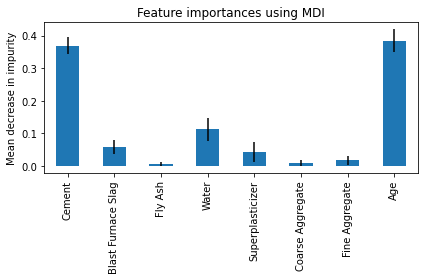

In [41]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Важность признаков на основе перестановки признаков (feature permutation)

Такой подход преодолевает ограничения важности признака на основе примесей: признаки не имеют предвзятости в сторону признаков с высокой мощностью и могут быть вычислены на оставленном наборе тестов.

[sklearn.inspection.permutation_importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)

Вычисление важности полной перестановки **более затратно: признаки перемешиваются `n` раз**, и модель перестраивается, чтобы оценить их важность.

При использовании обоих методов одни и те же признаки определяются как наиболее важные. Хотя относительные значения различаются.

In [42]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)

result

{'importances_mean': array([0.51752684, 0.09865376, 0.00217612, 0.12778288, 0.06499024,
        0.00818198, 0.01669818, 0.73722719]),
 'importances_std': array([0.05247944, 0.00959681, 0.00269735, 0.0155533 , 0.00669376,
        0.00230794, 0.0020946 , 0.06023409]),
 'importances': array([[ 5.66811445e-01,  4.27558324e-01,  5.18712868e-01,
          5.55140561e-01,  5.44341300e-01,  4.59856410e-01,
          5.22389509e-01,  5.62668404e-01,  5.77254444e-01,
          4.40535130e-01],
        [ 1.01417327e-01,  9.13723851e-02,  9.93729137e-02,
          1.03592698e-01,  9.90384527e-02,  1.12048671e-01,
          8.08211890e-02,  8.47048869e-02,  1.06335309e-01,
          1.07833789e-01],
        [ 4.44583740e-04, -2.30314465e-03,  4.16549002e-03,
          1.27617610e-03,  2.55115820e-03,  5.80015549e-03,
          2.83790770e-03,  9.33974383e-04,  6.78396786e-03,
         -7.29023078e-04],
        [ 1.28944839e-01,  1.28381548e-01,  1.45817645e-01,
          1.17291696e-01,  1.12622922

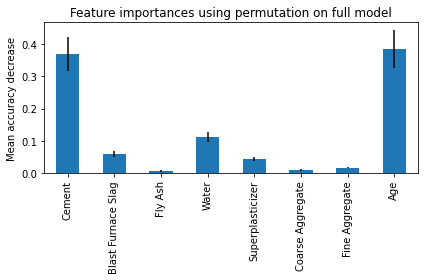

In [43]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

## График частичной зависимости (Partial Dependence Plot)



## Pipeline